### Loading and Viewing the Dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np

# load the datasets
retail_data = pd.read_csv('retail_data_W23 - retail_data_W23.csv')
retail_orders = pd.read_csv('retail_orders_W23 - retail_orders_W23.csv')
store_data = pd.read_csv('store - store.csv')

In [2]:
# store dataframes in a dictionary
dataframes = {'retail_data': retail_data, 'retail_orders': retail_orders, 'store_data': store_data}

# view first 5 rows and info
for name, df in dataframes.items():
    print(f"\n{name} DataFrame - First 5 Rows:")
    print(df.head()) 
    
    print(f"\n{name} DataFrame - Info:")
    print(df.info())


retail_data DataFrame - First 5 Rows:
   Store  DayOfWeek        Date  Customers  Open  Promo StateHoliday  \
0      3          5  2015-07-31        821     1      1            0   
1      4          5  2015-07-31       1498     1      1            0   
2      5          5  2015-07-31        559     1      1            0   
3      6          5  2015-07-31        589     1      1            0   
4     10          5  2015-07-31        681     1      1            0   

   SchoolHoliday   Id  
0              1  409  
1              1  427  
2              1  445  
3              1  463  
4              1  535  

retail_data DataFrame - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651013 entries, 0 to 651012
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          651013 non-null  int64 
 1   DayOfWeek      651013 non-null  int64 
 2   Date           651013 non-null  object
 3   Customers      651

### Merging data

In [3]:
merged_data = pd.merge(retail_data, store_data, on='Store', how='left')
merged_data = pd.merge(merged_data, retail_orders, on='Id', how='left')

### Exploratory Data Analysis

In [4]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651013 entries, 0 to 651012
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      651013 non-null  int64  
 1   DayOfWeek                  651013 non-null  int64  
 2   Date                       651013 non-null  object 
 3   Customers                  651013 non-null  int64  
 4   Open                       651013 non-null  int64  
 5   Promo                      651013 non-null  int64  
 6   StateHoliday               651013 non-null  object 
 7   SchoolHoliday              651013 non-null  int64  
 8   Id                         651013 non-null  int64  
 9   StoreType                  651013 non-null  object 
 10  Assortment                 651013 non-null  object 
 11  CompetitionDistance        649312 non-null  float64
 12  CompetitionOpenSinceMonth  443851 non-null  float64
 13  CompetitionOpenSinceYear   44

In [5]:
print(merged_data.describe())

               Store      DayOfWeek      Customers           Open  \
count  651013.000000  651013.000000  651013.000000  651013.000000   
mean      558.645629       3.999336     632.851832       0.829619   
std       321.905872       1.998260     464.857658       0.375967   
min         1.000000       1.000000       0.000000       0.000000   
25%       281.000000       2.000000     404.000000       1.000000   
50%       558.000000       4.000000     609.000000       1.000000   
75%       838.000000       6.000000     837.000000       1.000000   
max      1115.000000       7.000000    5458.000000       1.000000   

               Promo  SchoolHoliday            Id  CompetitionDistance  \
count  651013.000000  651013.000000  6.510130e+05        649312.000000   
mean        0.381558       0.178927  9.153619e+06          5436.342390   
std         0.485769       0.383292  5.285944e+06          7713.881629   
min         0.000000       0.000000  4.090000e+02            20.000000   
25%     

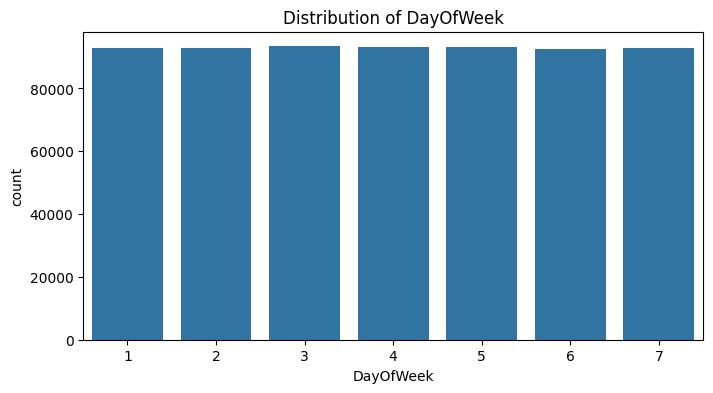

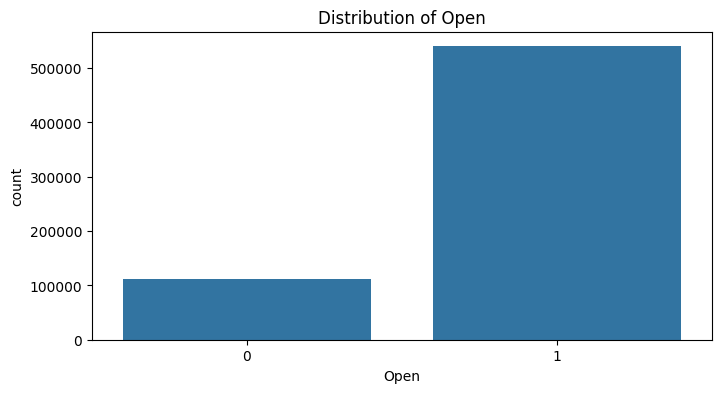

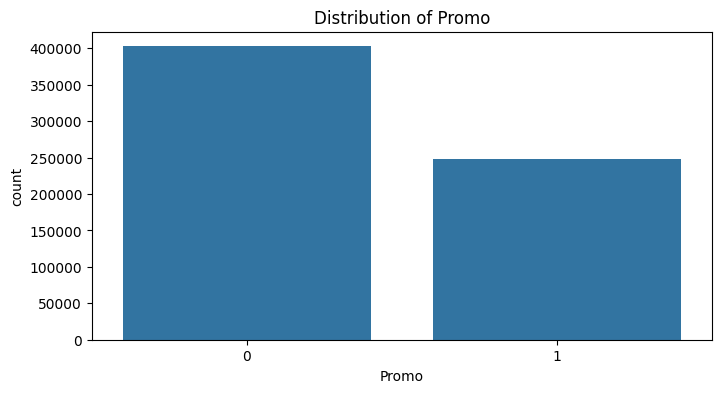

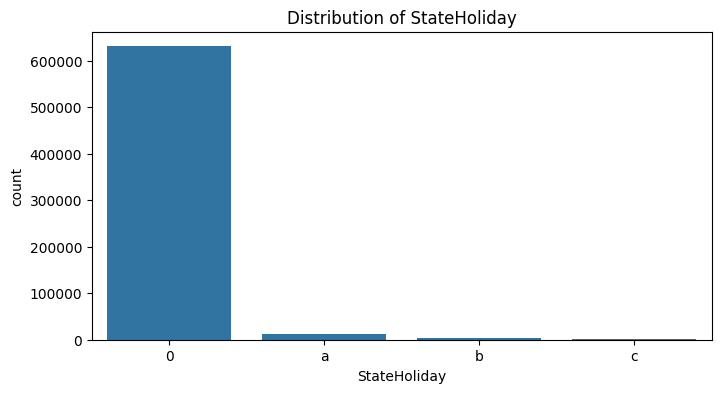

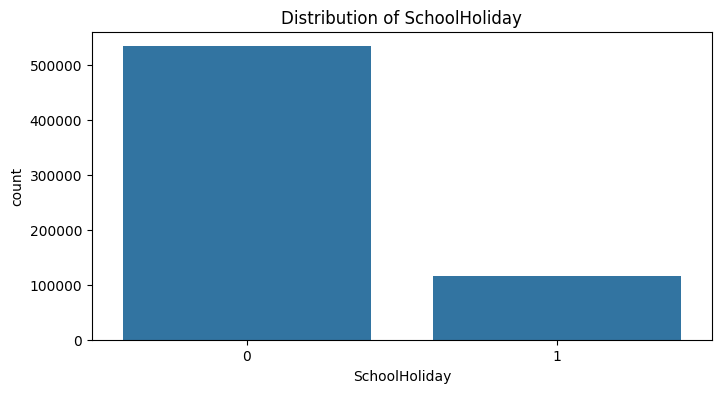

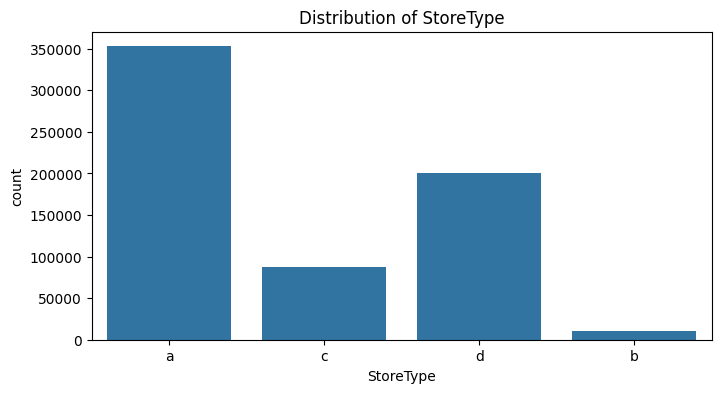

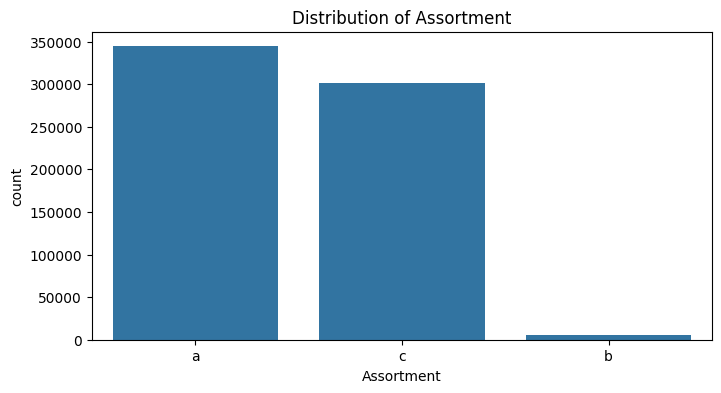

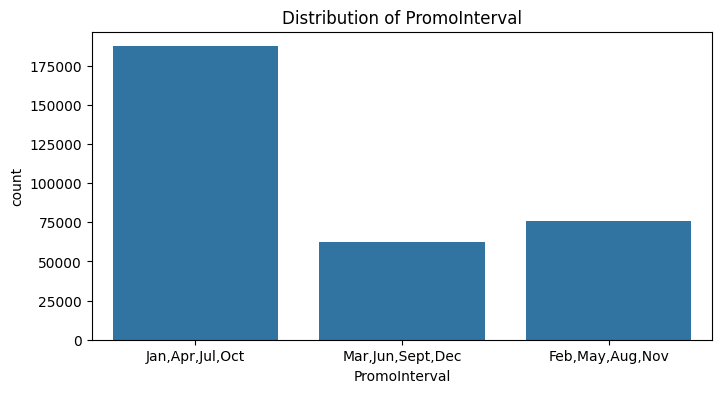

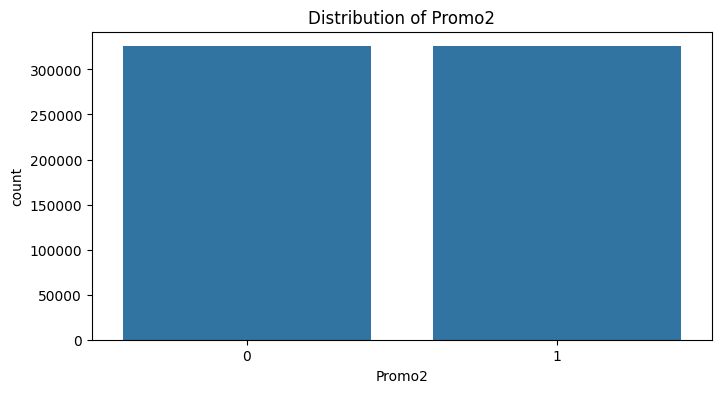

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical columns to visualize
categorical_columns = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'Promo2']

# Loop through categorical columns and create count plots
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=merged_data)
    plt.title(f"Distribution of {col}")
    plt.show()

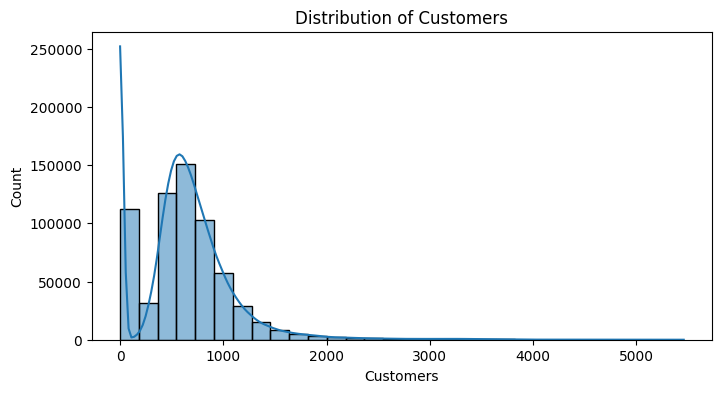

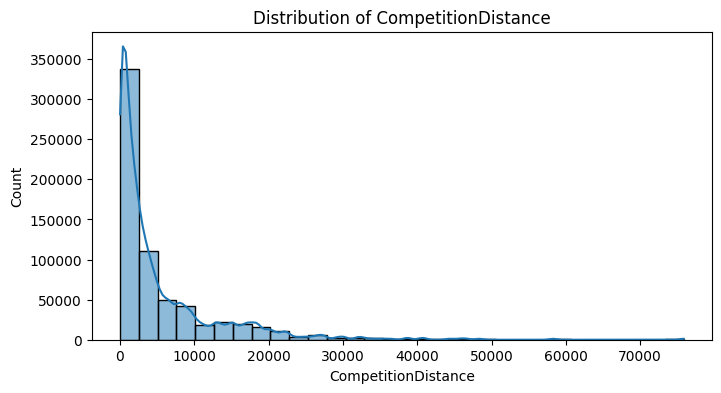

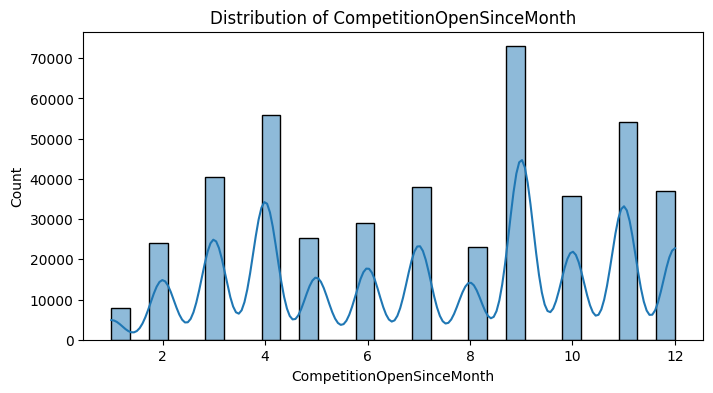

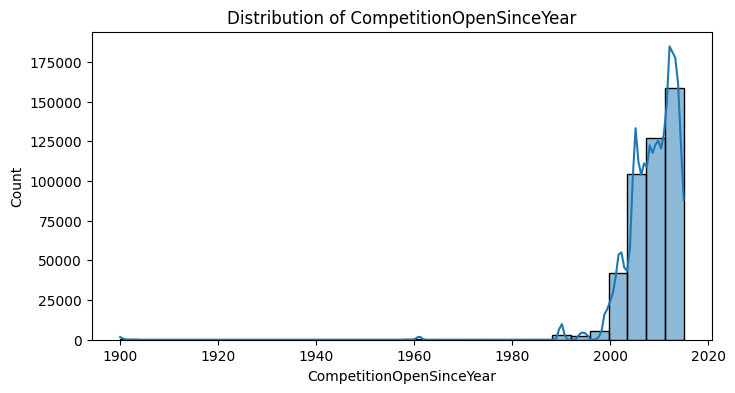

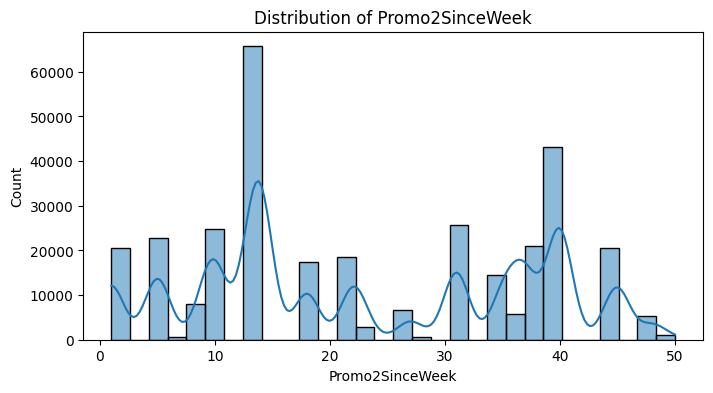

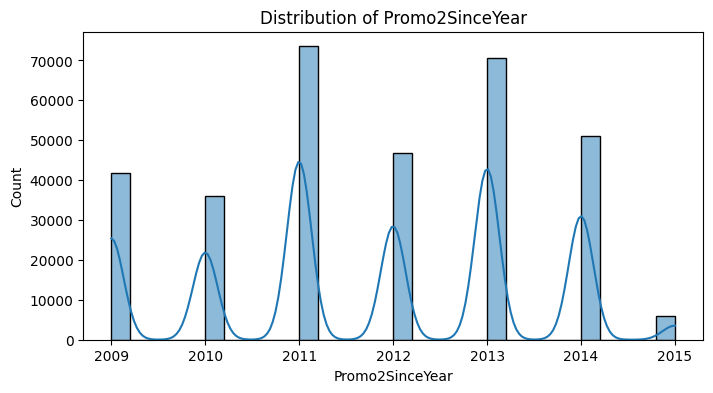

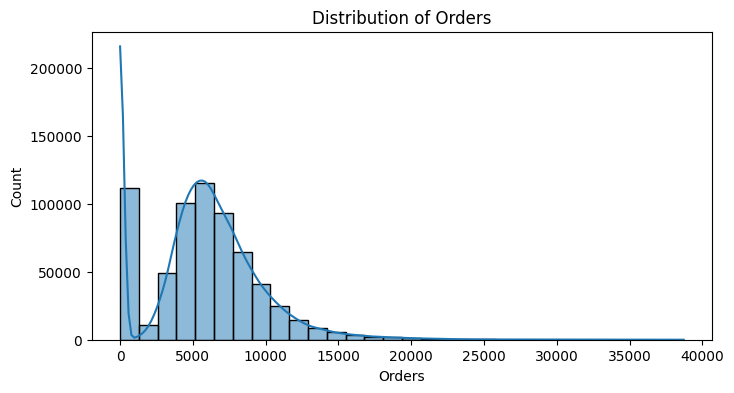

In [7]:
# Numerical columns
numerical_columns = ['Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Orders']

# Loop through numerical columns and create histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Handle Missing Values

In [8]:
# check for missing values
print(merged_data.isna().sum())

Store                             0
DayOfWeek                         0
Date                              0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Id                                0
StoreType                         0
Assortment                        0
CompetitionDistance            1701
CompetitionOpenSinceMonth    207162
CompetitionOpenSinceYear     207162
Promo2                            0
Promo2SinceWeek              325446
Promo2SinceYear              325446
PromoInterval                325446
Orders                            0
dtype: int64


#### Clone the merged_data in case cleaning is wrong

In [17]:
# Clone merged_data to cleaned_data
cleaned_data = merged_data.copy()

#### Update missing values from competitor-related columns

In [18]:
# Merged competitor-related columns into one df
competitor_df = cleaned_data[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]

# Create a mask where all three competition-related columns are NaN
mask = competitor_df.isna().all(axis=1)

# Count rows where all three columns are NaN
num_records_with_nan = mask.sum()
print(f"Number of records with NaN in all three columns: {num_records_with_nan}")

# Replace NaN values with 0 only where all three columns are NaN
cleaned_data.loc[mask, ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = 0

# Verify if NaN values are replaced
print(cleaned_data.isna().sum())

Number of records with NaN in all three columns: 1701
Store                             0
DayOfWeek                         0
Date                              0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Id                                0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    205461
CompetitionOpenSinceYear     205461
Promo2                            0
Promo2SinceWeek              325446
Promo2SinceYear              325446
PromoInterval                325446
Orders                            0
dtype: int64


#### Update missing values from CompetitionOpenSinceMonth and CompetitionOpenSinceYear  

In [19]:
# Fill missing values with mode (most frequent value)
cleaned_data['CompetitionOpenSinceMonth'] = cleaned_data['CompetitionOpenSinceMonth'].fillna(cleaned_data['CompetitionOpenSinceMonth'].mode()[0])
cleaned_data['CompetitionOpenSinceYear'] = cleaned_data['CompetitionOpenSinceYear'].fillna(cleaned_data['CompetitionOpenSinceYear'].mode()[0])

In [20]:
# Verify if NaN values are replaced
print(cleaned_data.isna().sum())

Store                             0
DayOfWeek                         0
Date                              0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Id                                0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              325446
Promo2SinceYear              325446
PromoInterval                325446
Orders                            0
dtype: int64


#### Update missing values from promo2-related columns

In [21]:
# Merged promo2-related columns into one df
promo2_df = cleaned_data[['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']]

# Filter rows where Promo2 is 0 and both Promo2SinceWeek and Promo2SinceYear are NaN
no_promo2 = cleaned_data[(cleaned_data['Promo2'] == 0) & 
                         (cleaned_data['Promo2SinceWeek'].isna()) & 
                         (cleaned_data['Promo2SinceYear'].isna()) & 
                         (cleaned_data['PromoInterval'].isna())]

# Count rows where there is no promo2
num_no_promo2 = no_promo2.shape[0]

print(f"Number of records where there are missing promo2 related info: {num_no_promo2}")

Number of records where there are missing promo2 related info: 325446


In [22]:
# Fill NaN values in Promo2SinceWeek and Promo2SinceYear with 0 for rows where Promo2 == 0
cleaned_data.loc[no_promo2.index, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

In [23]:
# Verify if NaN values are replaced
print(cleaned_data.isna().sum())

Store                        0
DayOfWeek                    0
Date                         0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Id                           0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Orders                       0
dtype: int64


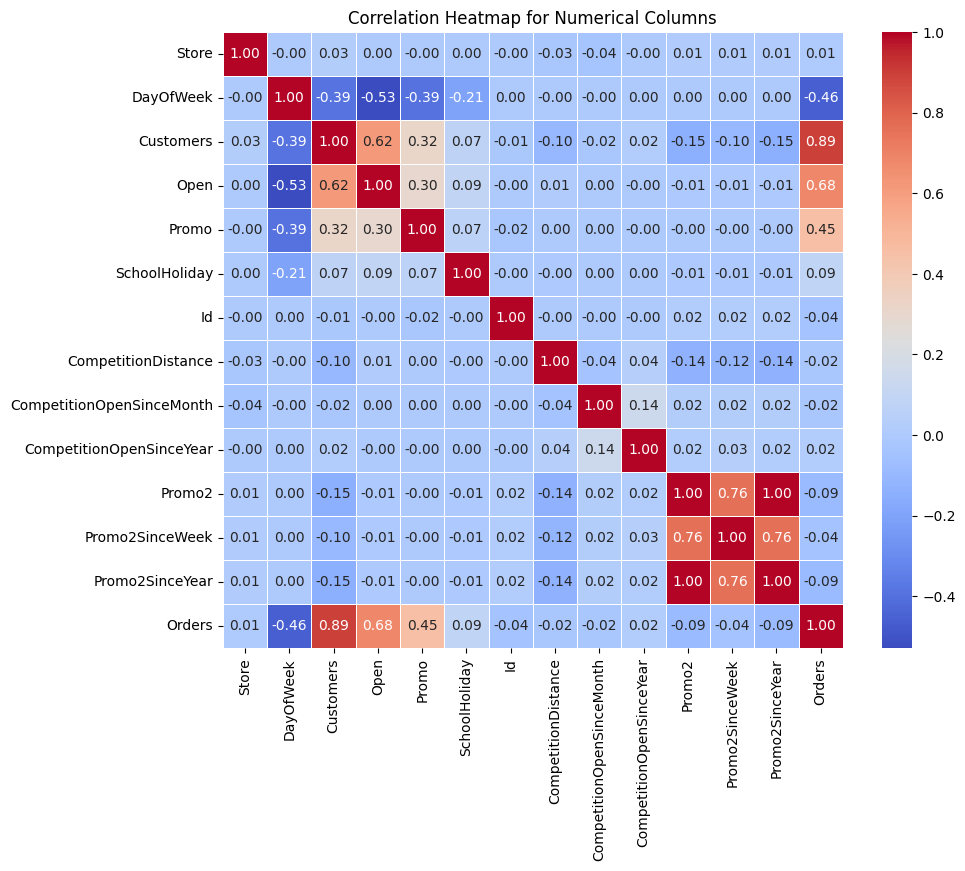

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns (including boolean if you want to keep them)
numerical_data = cleaned_data.select_dtypes(include=['float64', 'int64', 'bool'])

# Compute the correlation matrix for numerical data
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

### Encoding for Categroical Columns

In [30]:
# Apply one-hot encoding for categorical columns
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
encoded_data = pd.get_dummies(cleaned_data, columns=categorical_cols)

# Verify encoding
print(encoded_data.head())

   Store        Date  Customers  Open  Promo  SchoolHoliday   Id  \
0      3  2015-07-31        821     1      1              1  409   
1      4  2015-07-31       1498     1      1              1  427   
2      5  2015-07-31        559     1      1              1  445   
3      6  2015-07-31        589     1      1              1  463   
4     10  2015-07-31        681     1      1              1  535   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              14130.0                       12.0                    2006.0   
1                620.0                        9.0                    2009.0   
2              29910.0                        4.0                    2015.0   
3                310.0                       12.0                    2013.0   
4               3160.0                        9.0                    2009.0   

   ...  StoreType_b  StoreType_c  StoreType_d  Assortment_a  Assortment_b  \
0  ...        False        False       

### Scaling for numerical columns

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
numerical_cols = ['Customers', 'Orders']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling
encoded_data[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])

# Verify scaling
print(encoded_data.describe())

               Store      Customers           Open          Promo  \
count  651013.000000  651013.000000  651013.000000  651013.000000   
mean      558.645629       0.115949       0.829619       0.381558   
std       321.905872       0.085170       0.375967       0.485769   
min         1.000000       0.000000       0.000000       0.000000   
25%       281.000000       0.074020       1.000000       0.000000   
50%       558.000000       0.111579       1.000000       0.000000   
75%       838.000000       0.153353       1.000000       1.000000   
max      1115.000000       1.000000       1.000000       1.000000   

       SchoolHoliday            Id  CompetitionDistance  \
count  651013.000000  6.510130e+05        651013.000000   
mean        0.178927  9.153619e+06          5422.138037   
std         0.383292  5.285944e+06          7708.794498   
min         0.000000  4.090000e+02             0.000000   
25%         0.000000  4.578709e+06           700.000000   
50%         0.000000  9.

### Feature Engineering

#### Time-Based Features

In [46]:
# Ensure the 'Date' column is in datetime format
encoded_data['Date'] = pd.to_datetime(encoded_data['Date'], errors='coerce')

encoded_data['Year'] = encoded_data['Date'].dt.year
encoded_data['Month'] = encoded_data['Date'].dt.month
encoded_data['WeekOfYear'] = encoded_data['Date'].dt.isocalendar().week
encoded_data['Day'] = encoded_data['Date'].dt.day

# Check the dataset after updating
print(encoded_data[['Date', 'Year', 'Month', 'WeekOfYear', 'Day']].head())

        Date  Year  Month  WeekOfYear  Day
0 2015-07-31  2015      7          31   31
1 2015-07-31  2015      7          31   31
2 2015-07-31  2015      7          31   31
3 2015-07-31  2015      7          31   31
4 2015-07-31  2015      7          31   31


#### Promo2 Features

In [47]:
# Promo2Duration: If promo2 is active, how long it has been active
last_recorded_year = 2015
encoded_data['Promo2Duration'] = encoded_data['Promo2SinceYear'].apply(lambda x: last_recorded_year - x if x > 0 else 0)

# Check the dataset after updating
print(encoded_data[['Promo2Duration']].head())

   Promo2Duration
0             4.0
1             0.0
2             0.0
3             0.0
4             0.0


#### Competitor Features

In [52]:
# CompetitionOpenDuration: How long competitors have been operating
last_recorded_year = 2015
encoded_data['CompetitionOpenDuration'] = last_recorded_year - encoded_data['CompetitionOpenSinceYear']

# CompetitionDistance_Category: Binning competition distance into categories
encoded_data['CompetitionDistance_Category'] = pd.cut(encoded_data['CompetitionDistance'], 
                                                      bins=[-1, 0, 1000, 5000, 10000, 20000, float('inf')],
                                                      labels=['No Competition', 'Very Close', 'Close', 'Moderate', 'Far', 'Very Far'])

print(encoded_data[['CompetitionOpenDuration', 'CompetitionDistance_Category']].head())

   CompetitionOpenDuration CompetitionDistance_Category
0                      9.0                          Far
1                      6.0                   Very Close
2                      0.0                     Very Far
3                      2.0                   Very Close
4                      6.0                        Close


#### Holiday Features (Promo and Holidays) 

In [53]:
# Promo_SchoolHoliday Interaction: Customers may shop more if a promo happens during school holidays
encoded_data['Promo_SchoolHoliday'] = encoded_data['Promo'] * encoded_data['SchoolHoliday']

# Promo_StateHoliday: Similar interaction for different types of state holidays
encoded_data['Promo_StateHoliday_0'] = encoded_data['Promo'] * encoded_data['StateHoliday_0']
encoded_data['Promo_StateHoliday_a'] = encoded_data['Promo'] * encoded_data['StateHoliday_a']
encoded_data['Promo_StateHoliday_b'] = encoded_data['Promo'] * encoded_data['StateHoliday_b']
encoded_data['Promo_StateHoliday_c'] = encoded_data['Promo'] * encoded_data['StateHoliday_c']

print(encoded_data[['Promo_SchoolHoliday', 'Promo_StateHoliday_0', 'Promo_StateHoliday_a', 'Promo_StateHoliday_b', 'Promo_StateHoliday_c']].head()) 

   Promo_SchoolHoliday  Promo_StateHoliday_0  Promo_StateHoliday_a  \
0                    1                     1                     0   
1                    1                     1                     0   
2                    1                     1                     0   
3                    1                     1                     0   
4                    1                     1                     0   

   Promo_StateHoliday_b  Promo_StateHoliday_c  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0  


In [55]:
# After Feature Engineering, check if any missing values
print(encoded_data.isna().sum())

Store                             0
Date                              0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
Id                                0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
Orders                            0
DayOfWeek_1                       0
DayOfWeek_2                       0
DayOfWeek_3                       0
DayOfWeek_4                       0
DayOfWeek_5                       0
DayOfWeek_6                       0
DayOfWeek_7                       0
StateHoliday_0                    0
StateHoliday_a                    0
StateHoliday_b                    0
StateHoliday_c                    0
StoreType_a                       0
StoreType_b                       0
StoreType_c                 